In [2]:
import numpy as np                                       # fast vectors and matrices
import matplotlib.pyplot as plt                          # plotting
from scipy import fft, fftpack

from IPython.display import Audio

from intervaltree import Interval,IntervalTree

%matplotlib inline

In [3]:
fs = 44100      # samples/second

In [4]:
train_data = np.load('./numpy_version/musicnet.npz', encoding='bytes')

print ('Number of recordings: ' + str(len(train_data.files)))
print ('Example MusicNet ids: ' + str(list(train_data.keys())[0:5]))

Number of recordings: 330
Example MusicNet ids: ['1788', '1789', '2659', '2127', '1818']


# Scipy method

In [5]:
X,Y = train_data['2494'] # data X and labels Y for recording id 1788

window_size = 2048  # 2048-sample fourier windows
stride = 512        # 512 samples between windows
wps = fs/float(512) # ~86 windows/second
Xs = np.empty([int(10*wps),2048])

for i in range(Xs.shape[0]):
    Xs[i] = np.abs(fft(X[i*stride:i*stride+window_size]))

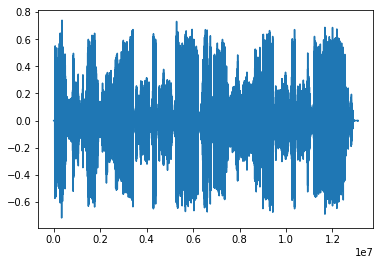

In [6]:
plt.plot(X)

Text(0, 0.5, 'frequency')

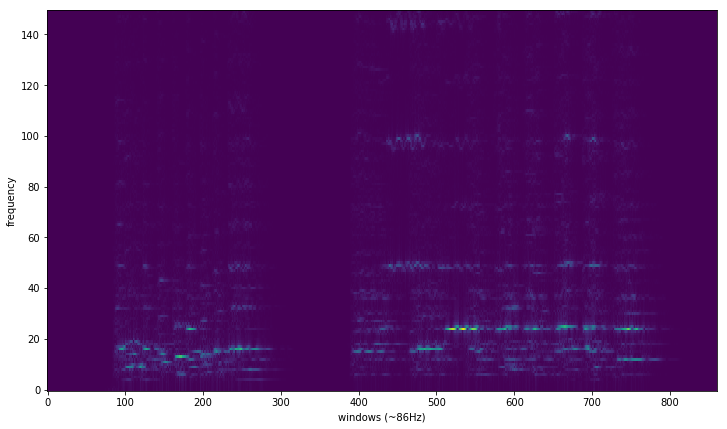

In [8]:
fig = plt.figure(figsize=(12,7))
plt.imshow(Xs.T[0:150],aspect='auto')
plt.gca().invert_yaxis()
fig.axes[0].set_xlabel('windows (~86Hz)')
fig.axes[0].set_ylabel('frequency')

# Librosa Method

In [450]:
from librosa import stft
from librosa.display import specshow

In [451]:
X_libs = stft(X, n_fft=window_size, hop_length=stride)
X_libs = np.abs(X_libs)[:,:int(10*wps)]

Text(0, 0.5, 'frequency')

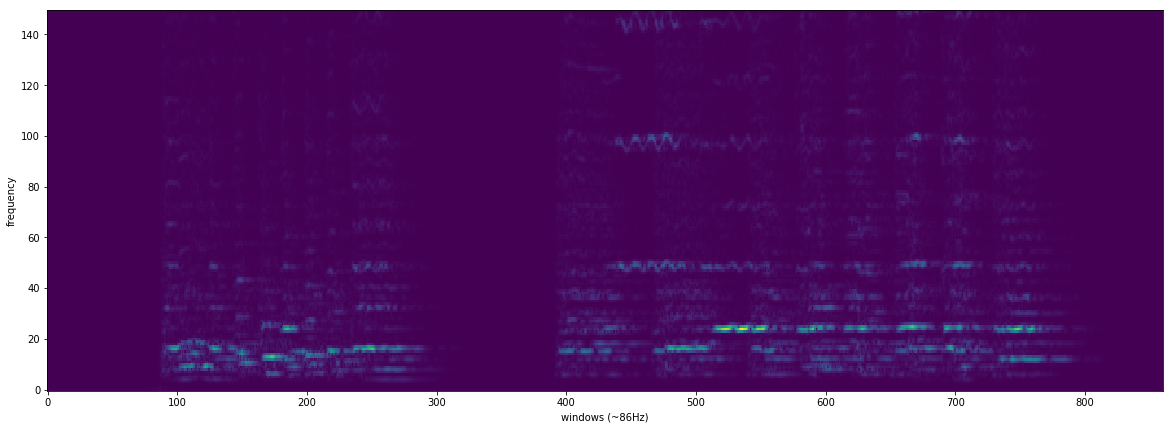

In [452]:
fig = plt.figure(figsize=(20,7))
plt.imshow(X_libs[0:150],aspect='auto')
plt.gca().invert_yaxis()
fig.axes[0].set_xlabel('windows (~86Hz)')
fig.axes[0].set_ylabel('frequency')

In [453]:
X_libs[0:150] == Xs.T[0:150]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

# Artifical data

In [454]:
f = 10000  # Frequency, in cycles per second, or Hertz
fs = 44100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 5, 5 * f_s, endpoint=False)
X = np.sin(f * 2 * np.pi * t)

# Scipy method

In [457]:
window_size = 2048  # 2048-sample fourier windows
stride = 512        # 512 samples between windows
wps = fs/float(512) # ~86 windows/second
Xs = np.empty([int(2*wps),2048])

for i in range(Xs.shape[0]):
    Xs[i] = np.abs(fft(X[i*stride:i*stride+window_size]))

In [416]:
Xs.T[:window_size//2].shape

(1024, 172)

Text(0, 0.5, 'frequency')

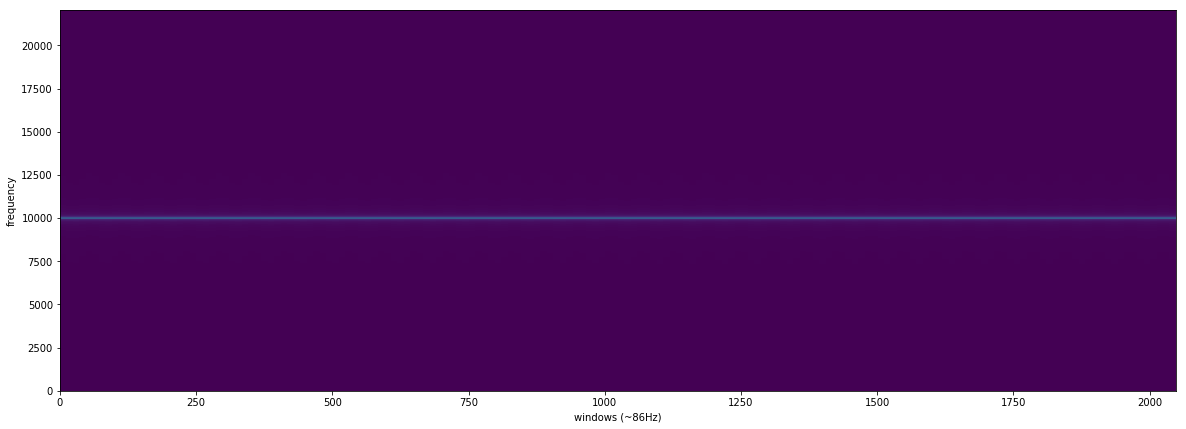

In [419]:
fig = plt.figure(figsize=(20,7))
plt.imshow(Xs.T[:window_size//2],aspect='auto', extent=[0, Xs.shape[1],fftpack.fftfreq(window_size,1/fs).max(),0])
plt.gca().invert_yaxis()
fig.axes[0].set_xlabel('windows (~86Hz)')
fig.axes[0].set_ylabel('frequency')

In [406]:
y_ticks = fftpack.fftfreq(window_size,1/fs)

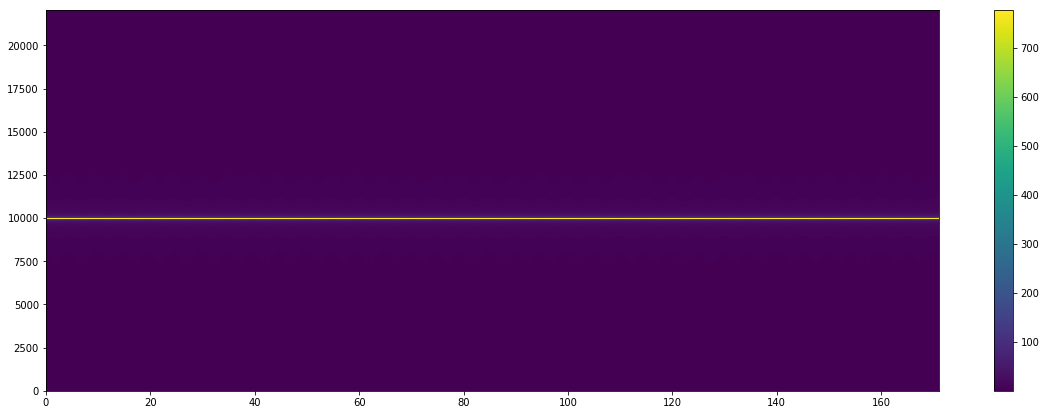

In [429]:
fig = plt.figure(figsize=(20,7))
plt.pcolormesh(np.arange(Xs.T.shape[1]), y_ticks[y_ticks>=0], Xs.T[:window_size//2])
plt.colorbar()

# Double

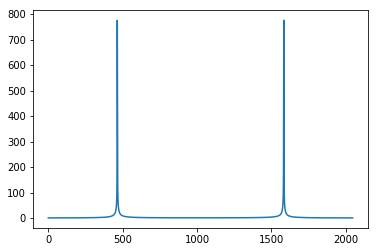

In [427]:
plt.plot(Xs[0])

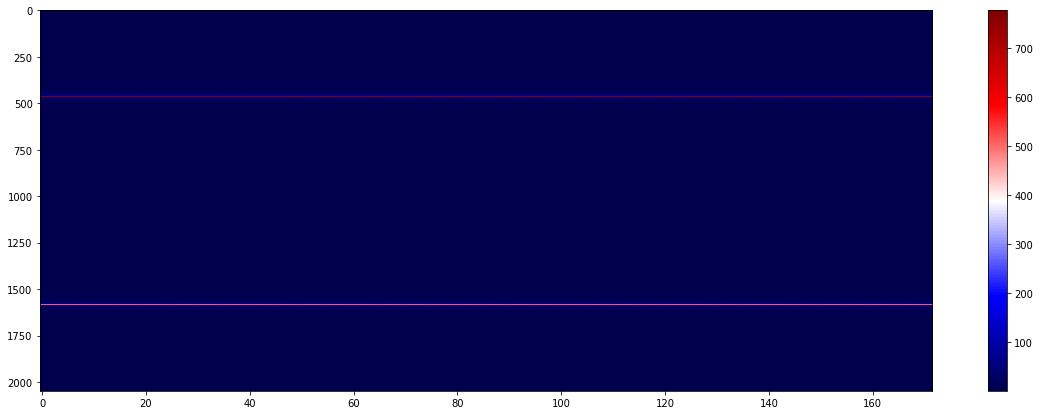

In [436]:
fig = plt.figure(figsize=(20,7))
plt.imshow(Xs.T,aspect='auto',cmap='seismic')
plt.colorbar()

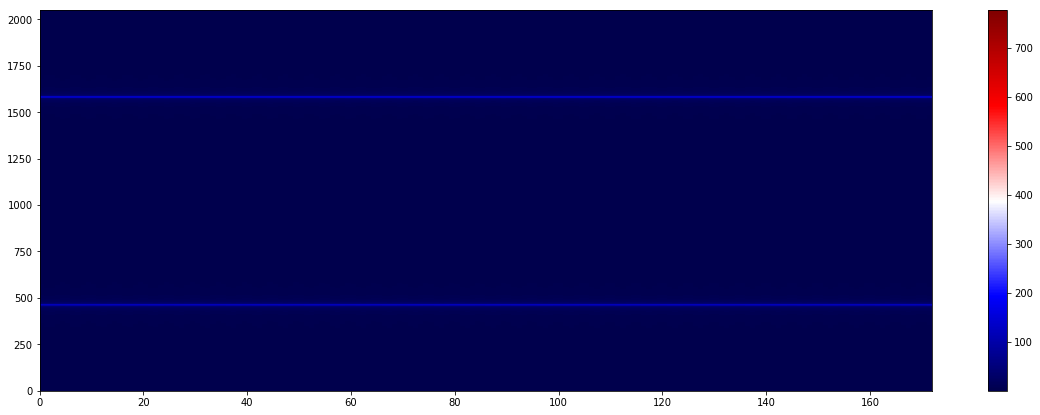

In [435]:
fig = plt.figure(figsize=(20,7))
plt.pcolormesh(Xs.T,cmap='seismic')
plt.colorbar()

In [408]:
import librosa

In [409]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(X)), ref=np.max )

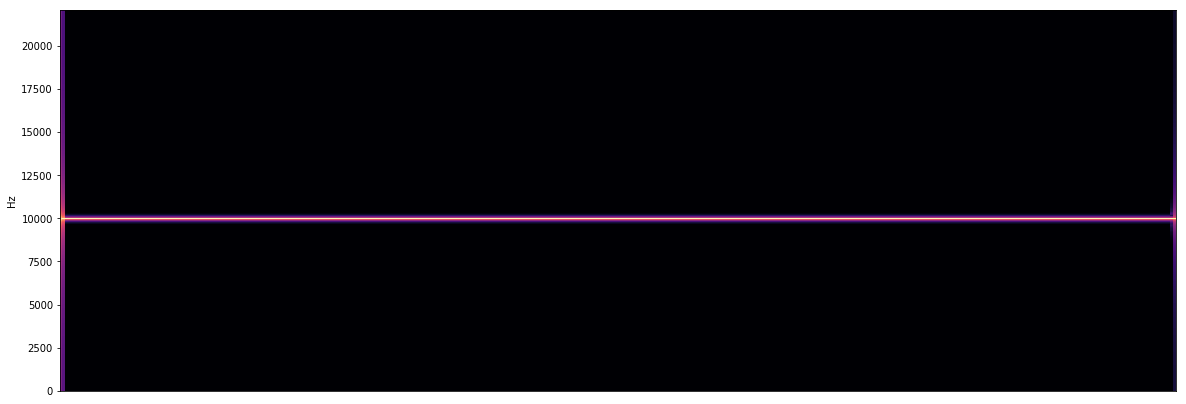

In [410]:
fig = plt.figure(figsize=(20,7))
librosa.display.specshow(D, y_axis='linear', sr=fs, hop_length=stride,)

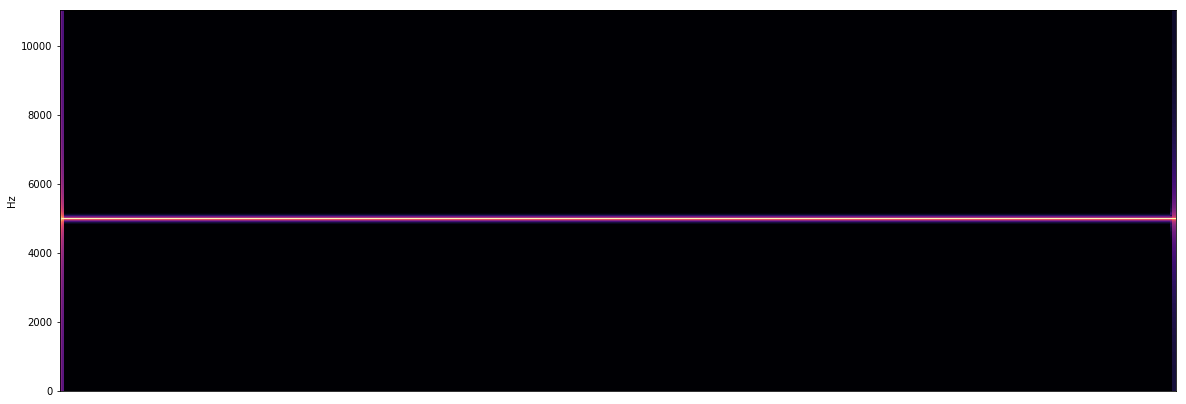

In [411]:
fig = plt.figure(figsize=(20,7))
librosa.display.specshow(D, y_axis='linear')

# Librosa Method

In [214]:
X_libs = stft(X, n_fft=window_size, hop_length=stride, center=False,)
X_libs = np.abs(X_libs)[:,:int(2*wps)]

Text(0, 0.5, 'frequency')

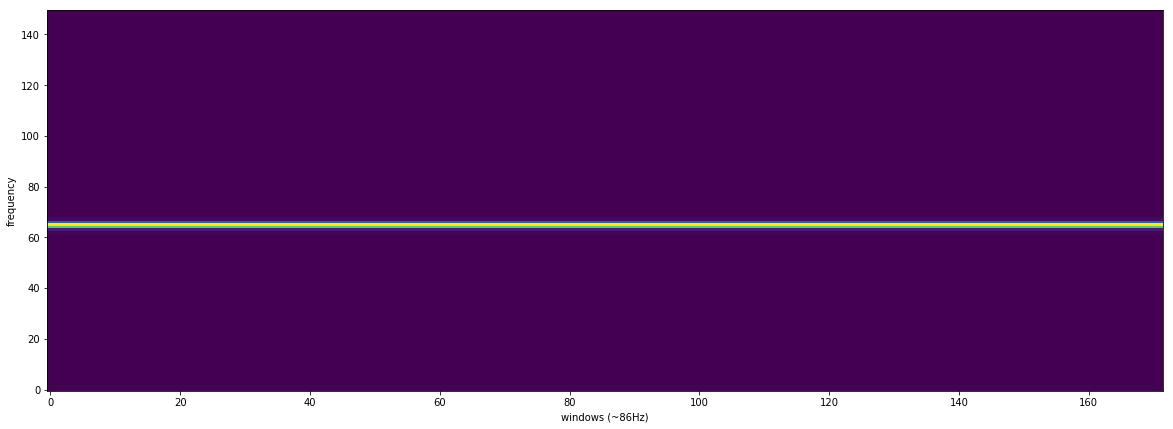

In [221]:
fig = plt.figure(figsize=(20,7))
plt.imshow(X_libs[50:200],aspect='auto')
plt.gca().invert_yaxis()
fig.axes[0].set_xlabel('windows (~86Hz)')
fig.axes[0].set_ylabel('frequency')